In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 29.8 MB/s eta 0:00:00


In [ ]:
!pip install dbfread

In [ ]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd
import pandas as pd

In [ ]:
## Authenticate your Google account to access Google Cloud services. This will allow you to interact with Google Cloud Storage using the credentials associated with your account.
## Also import your Google Drive to access your team's Shared Google Drive as well as Operating System
from google.colab import auth
from google.colab import drive
import os
auth.authenticate_user()
drive.mount('/content/drive/', force_remount=True)

## if your team is using a Shared Folder in a non-Google Workspace (for a free, individual account)
directory_path = '/content/drive/MyDrive/hdsi-copy/1/'

Mounted at /content/drive/


In [ ]:
import dbfread
import os
import pandas as pd

# Define paths
folder_name = "cropland_images/Adams/CDL_2006_53001.tif.vat.dbf"

# Join paths
dbf_file = os.path.join(directory_path, folder_name)

# Load the DBF file
table = dbfread.DBF(dbf_file)

df = pd.DataFrame(iter(table))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df)

     VALUE    RED  GREEN   BLUE                   CLASS_NAME  OPACITY
0        0  0.000  0.000  0.000                   Background      0.0
1        1  1.000  0.827  0.000                         Corn      1.0
2        2  1.000  0.149  0.149                       Cotton      1.0
3        3  0.000  0.659  0.894                         Rice      1.0
4        4  1.000  0.620  0.043                      Sorghum      1.0
5        5  0.149  0.439  0.000                     Soybeans      1.0
6        6  1.000  1.000  0.000                    Sunflower      1.0
7        7  0.000  0.000  0.000                                   1.0
8        8  0.000  0.000  0.000                                   1.0
9        9  0.000  0.000  0.000                                   1.0
10      10  0.439  0.647  0.000                      Peanuts      1.0
11      11  0.000  0.686  0.294                      Tobacco      1.0
12      12  0.867  0.647  0.043                   Sweet Corn      1.0
13      13  0.867  0

In [ ]:
df_copy = df.copy()
df_copy

,VALUE,RED,GREEN,BLUE,CLASS_NAME,OPACITY
0,0,0.000,0.000,0.000,Background,0.0
1,1,1.000,0.827,0.000,Corn,1.0
2,2,1.000,0.149,0.149,Cotton,1.0
3,3,0.000,0.659,0.894,Rice,1.0
4,4,1.000,0.620,0.043,Sorghum,1.0
5,5,0.149,0.439,0.000,Soybeans,1.0
6,6,1.000,1.000,0.000,Sunflower,1.0
7,7,0.000,0.000,0.000,,1.0
8,8,0.000,0.000,0.000,,1.0
9,9,0.000,0.000,0.000,,1.0


In [ ]:
df_cleaned = df_copy[~((df_copy['RED'] == 0.000) & (df_copy['GREEN'] == 0.000) & (df_copy['BLUE'] == 0.000))]
df_cleaned

,VALUE,RED,GREEN,BLUE,CLASS_NAME,OPACITY
1,1,1.000,0.827,0.000,Corn,1.0
2,2,1.000,0.149,0.149,Cotton,1.0
3,3,0.000,0.659,0.894,Rice,1.0
4,4,1.000,0.620,0.043,Sorghum,1.0
5,5,0.149,0.439,0.000,Soybeans,1.0
6,6,1.000,1.000,0.000,Sunflower,1.0
10,10,0.439,0.647,0.000,Peanuts,1.0
11,11,0.000,0.686,0.294,Tobacco,1.0
12,12,0.867,0.647,0.043,Sweet Corn,1.0
13,13,0.867,0.647,0.043,Pop or Orn Corn,1.0


In [ ]:
non_crop = [81, 82, 83, 87, 88, 92, 111, 112, 121, 122, 123, 124, 131, 141, 142, 143, 151, 176, 190, 195]

# Create a new column 'is_crop' with 1 if it's a crop, 0 if not a crop
df_cleaned['is_crop'] = df_cleaned['VALUE'].apply(lambda x: 0 if x in non_crop else 1)

print(df_cleaned)

     VALUE    RED  GREEN   BLUE                   CLASS_NAME  OPACITY  is_crop
1        1  1.000  0.827  0.000                         Corn      1.0        1
2        2  1.000  0.149  0.149                       Cotton      1.0        1
3        3  0.000  0.659  0.894                         Rice      1.0        1
4        4  1.000  0.620  0.043                      Sorghum      1.0        1
5        5  0.149  0.439  0.000                     Soybeans      1.0        1
6        6  1.000  1.000  0.000                    Sunflower      1.0        1
10      10  0.439  0.647  0.000                      Peanuts      1.0        1
11      11  0.000  0.686  0.294                      Tobacco      1.0        1
12      12  0.867  0.647  0.043                   Sweet Corn      1.0        1
13      13  0.867  0.647  0.043              Pop or Orn Corn      1.0        1
14      14  0.494  0.827  1.000                         Mint      1.0        1
21      21  0.886  0.000  0.486                     

<ipython-input-11-86a4dd748fd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_crop'] = df_cleaned['VALUE'].apply(lambda x: 0 if x in non_crop else 1)


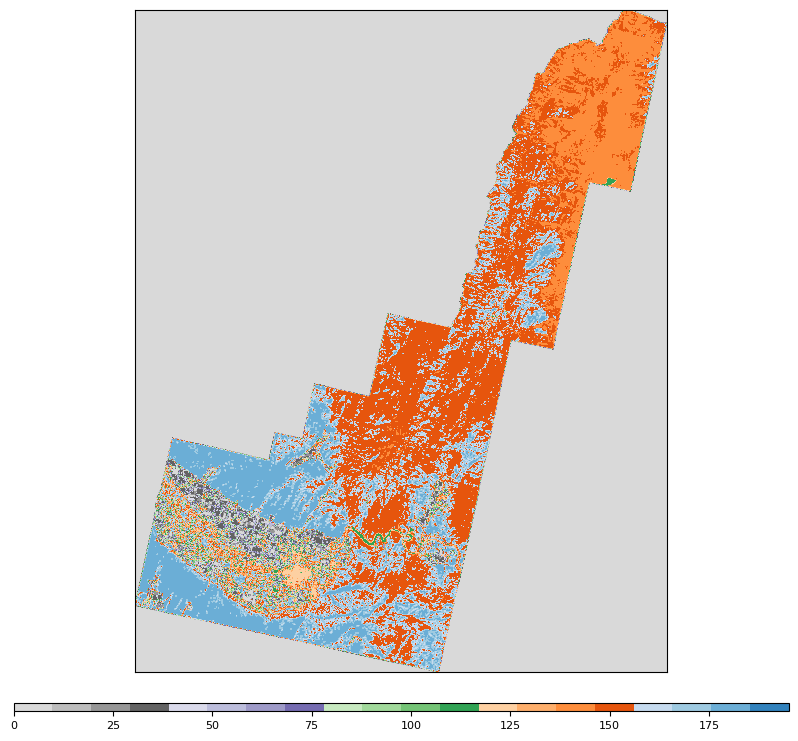

In [ ]:
image_name = "cropland_images/Gem/CDL_2007_16045.tif"
image_file = os.path.join(directory_path, image_name)


with rasterio.open(image_file) as src:
  #Read the data from the first band
  data = src.read(1)

  #Display raster image
  plt.figure(figsize=(10,10))
  plt.imshow(data, cmap='tab20c_r')
  plt.xticks([])
  plt.yticks([])

  #Plot colorbar
  cbar = plt.colorbar(orientation='horizontal', fraction=0.1, pad=0.04, aspect=90)
  cbar.ax.tick_params(labelsize=8)
  plt.show()

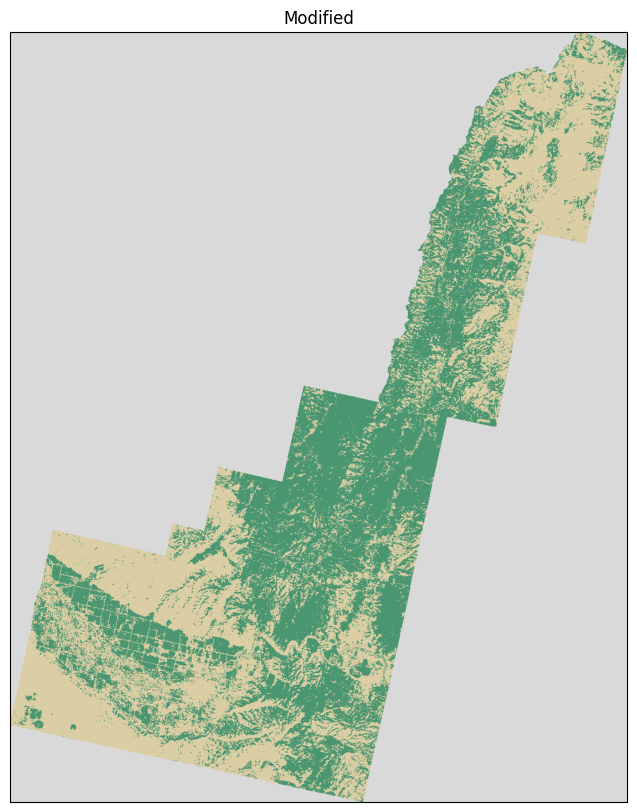

In [ ]:
#Iterate through pixels and assign values 1 or 0
pixel_to_color = {}
for index, row in df_cleaned.iterrows():
    pixel_to_color[row['VALUE']] = row['is_crop']

with rasterio.open(image_file) as src:
    # Read the data from the first band
    data = src.read(1)

    # Create an RGB array
    colored_image = np.zeros((*data.shape, 3), dtype=np.uint8)

    # Color pixels based on the mapping
    for pixel_value, color_flag in pixel_to_color.items():
        if color_flag == 1:
            colored_image[data == pixel_value] = [73, 150, 113]  # Green
        else:
            colored_image[data == pixel_value] = [220, 206, 164]  # Yellow

    unique_pixel_values = np.unique(data)
    for pixel_value in unique_pixel_values:
        if pixel_value not in pixel_to_color:
            colored_image[data == pixel_value] = [217, 217, 217]  # Gray

    # Display new raster image

    plt.figure(figsize=(10, 10))
    plt.imshow(colored_image)
    plt.xticks([])
    plt.yticks([])

    plt.title('Modified')
    plt.show()

In [ ]:
import pandas as pd
import rasterio
from io import BytesIO

non_crop = [0, 81, 82, 83, 87, 88, 92, 111, 112, 121, 122, 123, 124, 131, 141, 142, 143, 151, 176, 190, 195]

# FOR ONE YEAR
def findCropLocations(cropScapeFilePath):

    cropScapeFile = f'gs://hdsi-agri-prompt-data/{cropScapeFilePath}'
    # Define column names
    columns = ['x', 'y']
    # Create a list to collect pixel coordinates
    cropLocations_list = []

    with rasterio.open(cropScapeFile) as county:
        pixelData = county.read(1)  # Read the first band
        print("loopin")
        # Iterate through each pixel
        for row in range(pixelData.shape[0]):  # Loop through rows
            for col in range(pixelData.shape[1]):  # Loop through columns
                pixel_value = pixelData[row, col]  # Get the pixel value

                # Check if the pixel value is in the non_crop list
                if pixel_value not in non_crop:
                    # Append the pixel coordinates (row, column)
                    cropLocations_list.append((row, col))
        # Create a DataFrame from the collected pixel coordinates
        cropLocations = pd.DataFrame(cropLocations_list, columns=columns)

    return cropLocations


In [ ]:
import pandas as pd
#Create a dataframe of monthly averages across the county Gem
gem_data = {'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'avg_2007': [161, 158, 163, 187, 191, 183, 175, 170, 167, 172, 176, 150],
        'avg_2010': [141, 147, 169, 176, 195, 191, 190, 177, 169, 166, 149, 132],
        'avg_2011': [136, 149, 151, 178, 186, 189, 187, 174, 172, 173, 176, 174],
        'avg_2012': [162, 158, 157, 183, 191, 189, 178, 175, 168, 163, 165, 151],
        'avg_2016': [147, 163, 176, 201, 199, 189, 176, 173, 169, 166, 174, 139],
        'avg_2017': [125, 143, 172, 197, 205, 195, 182, 175, 173, 174, 171, 149],
        'avg_2018': [160, 162, 160, 186, 199, 195, 179, 171, 167, 163, 162, 142],
        'avg_2021': [148, 140, 158, 178, 189, 189, 181, 180, 178, 173, 183, 142],
        'avg_2022': [131, 145, 169, 188, 203, 203, 190, 177, 175, 167, 151, 127]}

gem_averages = pd.DataFrame(gem_data)
gem_averages

,Month,avg_2007,avg_2010,avg_2011,avg_2012,avg_2016,avg_2017,avg_2018,avg_2021,avg_2022
0,1,161,141,136,162,147,125,160,148,131
1,2,158,147,149,158,163,143,162,140,145
2,3,163,169,151,157,176,172,160,158,169
3,4,187,176,178,183,201,197,186,178,188
4,5,191,195,186,191,199,205,199,189,203
5,6,183,191,189,189,189,195,195,189,203
6,7,175,190,187,178,176,182,179,181,190
7,8,170,177,174,175,173,175,171,180,177
8,9,167,169,172,168,169,173,167,178,175
9,10,172,166,173,163,166,174,163,173,167


In [ ]:
#Scale the averages between 0 - 1 values
months_column = gem_averages.iloc[:, 0]
transformed_values = (gem_averages.iloc[:, 1:] - 125) / 125

gem_avg_converted = pd.concat([months_column, transformed_values], axis=1)
gem_avg_converted

,Month,avg_2007,avg_2010,avg_2011,avg_2012,avg_2016,avg_2017,avg_2018,avg_2021,avg_2022
0,1,0.288,0.128,0.088,0.296,0.176,0.000,0.280,0.184,0.048
1,2,0.264,0.176,0.192,0.264,0.304,0.144,0.296,0.120,0.160
2,3,0.304,0.352,0.208,0.256,0.408,0.376,0.280,0.264,0.352
3,4,0.496,0.408,0.424,0.464,0.608,0.576,0.488,0.424,0.504
4,5,0.528,0.560,0.488,0.528,0.592,0.640,0.592,0.512,0.624
5,6,0.464,0.528,0.512,0.512,0.512,0.560,0.560,0.512,0.624
6,7,0.400,0.520,0.496,0.424,0.408,0.456,0.432,0.448,0.520
7,8,0.360,0.416,0.392,0.400,0.384,0.400,0.368,0.440,0.416
8,9,0.336,0.352,0.376,0.344,0.352,0.384,0.336,0.424,0.400
9,10,0.376,0.328,0.384,0.304,0.328,0.392,0.304,0.384,0.336


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

X = gem_avg_converted[['avg_2007', 'avg_2010', 'avg_2011', 'avg_2012', 'avg_2016', 'avg_2017', 'avg_2018', 'avg_2021', 'avg_2022']]

# LOO-Cross Validation using 2022 data
y = gem_avg_converted ['avg_2022']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Predict the monthly averages for 2023
predicted_2023 = model.predict(X)

# Add the predictions to the DataFrame
gem_avg_converted['avg_2023_prediction'] = predicted_2023

print(gem_avg_converted[['Month', 'avg_2023_prediction']])

Mean Squared Error (MSE): 0.013531718399999981
Root Mean Squared Error (RMSE): 0.11632591456764903
    Month  avg_2023_prediction
0       1              0.19744
1       2              0.19232
2       3              0.34736
3       4              0.49832
4       5              0.59712
5       6              0.59504
6       7              0.50688
7       8              0.41888
8       9              0.40448
9      10              0.37640
10     11              0.33696
11     12              0.10336


Text(0.5, 1.0, 'Monthly Average Predictions for Gem County, Idaho for 2023')

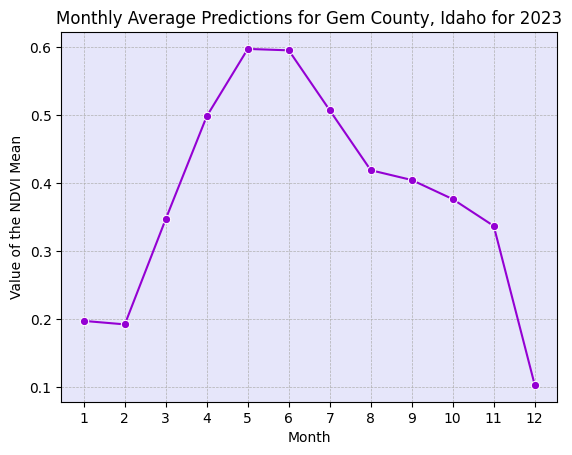

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

# Plot the data
x_values = range(0, len(gem_avg_converted))
sns.lineplot(x=x_values, y=gem_avg_converted['avg_2023_prediction'], marker='o', color='darkviolet')

# Set the x-axis and y-axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Value of the NDVI Mean')

#Adjust ticks
plt.xticks(rotation=0)
plt.xticks(range(len(gem_avg_converted['Month'])), gem_avg_converted['Month'])

#Add grid and background
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('lavender')

# Set the title of the plot
plt.title('Monthly Average Predictions for Gem County, Idaho for 2023')

In [ ]:
# Make a list of actual average monthly values for 2023
actual_values = [143.0, 149.0, 148.0, 164.0, 193.0, 195.0, 186.0,
                 178.0, 180.0, 181.0, 178.0, 163.0]

# Transform actual values so they are between 0-1
scaled_actual = [(value - 125) / 125 for value in actual_values]

Text(0.5, 1.0, 'Predicted vs. Actual NDVI Average Values for Gem County, Idaho for 2023')

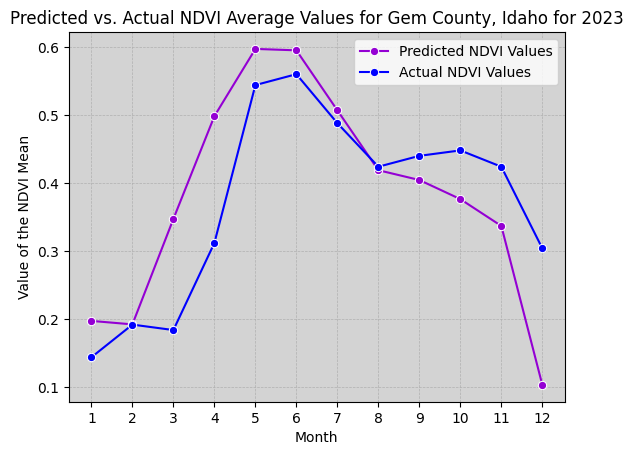

In [ ]:
fig, ax = plt.subplots()

# Plot the data
x_values = range(0, len(gem_avg_converted))
sns.lineplot(x=x_values, y=gem_avg_converted['avg_2023_prediction'], marker='o', color='darkviolet', label = 'Predicted NDVI Values')
sns.lineplot(x=x_values, y=scaled_actual, marker='o', color='b', label = 'Actual NDVI Values')

# Set the x-axis and y-axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Value of the NDVI Mean')

#Adjust ticks
plt.xticks(rotation=0)
plt.xticks(range(len(gem_avg_converted['Month'])), gem_avg_converted['Month'])

#Add grid and background
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('lightgray')

# Set the title of the plot
plt.legend()
plt.title('Predicted vs. Actual NDVI Average Values for Gem County, Idaho for 2023')


In [ ]:
# Make a list of differences between each predicted and actual NDVI values (each point)
differences = []

for i in range(12):
  difference = predicted_2023[i] - scaled_actual[i]
  differences.append(difference)

print(differences)


print('Actual values:', scaled_actual)
print('Predicted values:', predicted_2023)

[0.05343999999999996, 0.00031999999999998696, 0.1633599999999999, 0.1863199999999996, 0.0531200000000005, 0.035040000000000515, 0.01888000000000034, -0.005120000000000291, -0.03552000000000055, -0.07160000000000044, -0.08704000000000006, -0.20063999999999993]
Actual values: [0.144, 0.192, 0.184, 0.312, 0.544, 0.56, 0.488, 0.424, 0.44, 0.448, 0.424, 0.304]
Predicted values: [0.19744 0.19232 0.34736 0.49832 0.59712 0.59504 0.50688 0.41888 0.40448
 0.3764  0.33696 0.10336]
